In [104]:
# House Price Prediction

In [105]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/test.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/data_description.txt


In [106]:
#Imports

import numpy as np 
import pandas as pd 


# plot
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import  norm

import os

In [107]:
# Data Processing

train=pd.read_csv('../input/home-data-for-ml-course/train.csv')
test=pd.read_csv('../input/home-data-for-ml-course/test.csv')

In [108]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [109]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [110]:
print("Train.shape: ", train.shape, "\tTest.shape: ", test.shape)

Train.shape:  (1460, 81) 	Test.shape:  (1459, 80)


In [111]:
trainY=train.pop("SalePrice")
trainY

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [112]:
trainLen=len(train)
allData=pd.concat((train,test)).reset_index(drop=True)
allData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [113]:
# We first want to find and get rid of NaN

objCols = allData.select_dtypes(include=['object']).columns
numCols =allData.select_dtypes(exclude=['object']).columns
objCols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [114]:
numCols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [115]:
print("len num: ", len(numCols),"\tlen num: ", len(objCols))  #a+b=79   so check if we have all in a category

len num:  37 	len num:  43


In [116]:
nan=[col for col in allData.columns if allData[col].isnull().sum()>0] #List of Cols with nan
print(nan)

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [117]:
print(allData['MasVnrType'].isnull().sum(),allData["MasVnrArea"].isnull().sum()) # =no type=> no area? =>no mas..

24 23


In [118]:
print(allData['GarageType'].isnull().sum(),allData["GarageYrBlt"].isnull().sum())  #similar => no garage=> no jear built

157 159


In [119]:
allData['KitchenQual'].isnull().sum()  # 1 missing   maybe no kitchen

1

In [120]:
# a nan in fireplace. pool etc => no pool/fireplace etc.  Exterior2nd=Nan=probl just 1 material    no basement parameters=> probl no basement...
# you can get information from the data_description.txt
# these assumtions might be false sometime, but the results should be much better than dropping important cols like pool
cat=["Fence","PoolQC", "MiscFeature", "Alley",'FireplaceQu', 'MasVnrType',"Exterior2nd", "BsmtCond","BsmtExposure","BsmtFinType1", "BsmtFinType2", "KitchenQual", 
   "GarageType", "GarageFinish", "GarageQual", 'GarageCond', "BsmtQual"]#fill with None
num=["BsmtFinSF1","MasVnrArea","BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath", "GarageYrBlt", "GarageCars", "GarageArea", ] #fill with 0
for i in cat:
    allData[i].fillna(value="None", inplace=True)
for i in num:
    allData[i].fillna(value=0, inplace=True)

nan=[col for col in allData.columns if allData[col].isnull().sum()>0] #List of Cols with nan   after filling in stuff
print(nan) # these are the Parameters that you cant fill as easily(as far as i can see)

for i in nan:
    print(allData[i].isnull().sum())  # only LotFrontage has a lot of missing vals

['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Electrical', 'Functional', 'SaleType']
4
486
2
1
1
2
1


In [121]:
tiny=['MSZoning', 'Utilities', 'Exterior1st', 'Electrical', 'Functional','SaleType']
allData[tiny] = allData[tiny].fillna(allData.mode().iloc[0])  #fill cat with most common

nan=[col for col in allData.columns if allData[col].isnull().sum()>0] #List of Cols with nan   after filling in stuff
nan # LotFrontage is numerical  = Linear feet of street connected to property
#there are a lot of missing vals   I don't think this parametier is very Important to the price of a House but im not an expert

['LotFrontage']

In [122]:
allData["LotFrontage"] = allData["LotFrontage"].fillna(allData["LotFrontage"].mean())  #fill with mean
#now that we have gotten rid of NaN we have to further prep the data

numCols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [123]:
#notes:

#Maybe we could change YrSold and similar parameters to sold x years ago, which could improve the performance, but I dont't know what time the data has been collected. I will use 2020 as the "now" time.
#I decide not to combine month and year. Month on its own shows which season the sale took place which could have an impact.

# new cols, that might get insight/make it more obvious
allData["SoldYrAgo"]=2020-allData["YrSold"]
allData["GarageYrBltAgo"]=2020-allData["GarageYrBlt"]
allData["BuiltAgo"]=2020-allData["YearBuilt"]
allData["SoldYrAgo"]

0       12
1       13
2       12
3       14
4       12
        ..
2914    14
2915    14
2916    14
2917    14
2918    14
Name: SoldYrAgo, Length: 2919, dtype: int64

In [124]:
#creating the data to plot with later   before scaling... happens
plotdata=allData[:trainLen]
plotdata["Saleprice"]=trainY

#A value is trying to be set on a copy of a slice from a DataFrame.
#Try using .loc[row_indexer,col_indexer] = value instead

#See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
#  This is separate from the ipykernel package so we can avoid doing imports until

#onehot cols that are not linear
# i dont replace all categorical cols, because some should work fine in 1 col, i m looking at the data_description
neededOneHot=["MSZoning", "MSSubClass", "LandContour", "Utilities", "LotConfig", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", 
       "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterCond",  "Foundation",  "Heating", "Electrical", "GarageType", "MiscFeature",
        "SaleType", "SaleCondition"]

enc = OneHotEncoder(handle_unknown='ignore')
for col in neededOneHot:
    allData=pd.concat([allData,pd.get_dummies(allData[col],prefix=col)], axis=1)
    allData.drop([col],axis=1, inplace=True)

allData.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(2919, 246)

In [125]:
allData.BsmtFinType2.unique()

array(['Unf', 'BLQ', 'None', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [126]:
# manually concerting "quality" parameters
trans = {"Grvl": 0, "Pave": 1, "None": 2,}
allData['Alley']= allData['Alley'].map(trans)

trans = {"Reg": 0, "IR1": 1, "IR2": 2, "IR3": 3, "None": 4}
allData['LotShape']= allData['LotShape'].map(trans)

trans = {"Gtl": 0, "Mod": 1, "Sev": 2, "None": 3}
allData['LandSlope']= allData['LandSlope'].map(trans)

trans = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, "None": 5}
allData['ExterQual']= allData['ExterQual'].map(trans)

trans = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4,  "None": 5}
allData['BsmtQual']= allData['BsmtQual'].map(trans)

trans = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4,  "None": 5}
allData['BsmtCond']= allData['BsmtCond'].map(trans)

trans = { "Gd": 1, "Av": 2, "Mn": 3, "No": 4,  "None": 5}
allData['BsmtExposure']= allData['BsmtExposure'].map(trans)

trans = {"GLQ": 0, "ALQ": 1, "BLQ": 2, "Rec": 3, "LwQ": 4,  "Unf": 5, "None": 6}
allData['BsmtFinType1']= allData['BsmtFinType1'].map(trans)

trans = {"GLQ": 0, "ALQ": 1, "BLQ": 2, "Rec": 3, "LwQ": 4,  "Unf": 5, "None": 6}
allData['BsmtFinType2']= allData['BsmtFinType2'].map(trans)

trans = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, "None": 5}
allData['HeatingQC']= allData['HeatingQC'].map(trans)

trans = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, "None": 5}
allData['KitchenQual']= allData['KitchenQual'].map(trans)

trans = {"Typ": 0, "Min1": 1, "Min2": 2, "Mod": 3, "Maj1": 4,  "Maj2": 5,"Sev": 6,"Sal": 7, "None": 8}
allData['Functional']= allData['Functional'].map(trans)

trans = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, "None": 5}
allData['FireplaceQu']= allData['FireplaceQu'].map(trans)

trans = {"Fin": 0, "RFn": 1, "Unf": 2,  "None": 3}
allData['GarageFinish']= allData['GarageFinish'].map(trans)

trans = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, "None": 5}
allData['GarageQual']= allData['GarageQual'].map(trans)

trans = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, "None": 5}
allData['GarageCond']= allData['GarageCond'].map(trans)

trans = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, "None": 5}
allData['PoolQC']= allData['PoolQC'].map(trans)

trans = {"GdPrv": 0, "MnPrv": 1, "GdWo": 2, "MnWw": 3,  "None": 5}
allData['Fence']= allData['Fence'].map(trans)

#redo after onehot etc
objCols = allData.select_dtypes(include=['object']).columns
numCols =allData.select_dtypes(exclude=['object']).columns
l=[]
for i in objCols: #showing cat data example
    l.append(allData[i][0:5])
print(l)

#changing cat. data to num
for i in objCols:
    allData[i]= allData[i].astype('category').cat.codes

l=[]
for i in objCols: #showing they changed to num
    l.append(allData[i][0:5])
print(l)


#drop the cols we have twice
allData.drop("YrSold", axis=1, inplace=True)
allData.drop("GarageYrBltAgo", axis=1, inplace=True)
allData.drop("BuiltAgo", axis=1, inplace=True)

allData.shape #the shape stays the same

[0    Pave
1    Pave
2    Pave
3    Pave
4    Pave
Name: Street, dtype: object, 0    Y
1    Y
2    Y
3    Y
4    Y
Name: CentralAir, dtype: object, 0    Y
1    Y
2    Y
3    Y
4    Y
Name: PavedDrive, dtype: object]
[0    1
1    1
2    1
3    1
4    1
Name: Street, dtype: int8, 0    1
1    1
2    1
3    1
4    1
Name: CentralAir, dtype: int8, 0    2
1    2
2    2
3    2
4    2
Name: PavedDrive, dtype: int8]


(2919, 243)

In [127]:
scaler = MinMaxScaler()
for col in allData.columns:
    allData[col] = scaler.fit_transform(allData[col].values.reshape(-1,1))

allData

,Id,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.150685,0.033420,1.0,1.0,0.000000,0.0,0.666667,0.500,0.949275,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000343,0.202055,0.038795,1.0,1.0,0.000000,0.0,0.555556,0.875,0.753623,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000685,0.160959,0.046507,1.0,1.0,0.333333,0.0,0.666667,0.500,0.934783,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.001028,0.133562,0.038561,1.0,1.0,0.333333,0.0,0.666667,0.500,0.311594,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.001371,0.215753,0.060576,1.0,1.0,0.333333,0.0,0.777778,0.500,0.927536,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.998629,0.000000,0.002973,1.0,1.0,0.000000,0.0,0.333333,0.750,0.710145,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2915,0.998972,0.000000,0.002776,1.0,1.0,0.000000,0.0,0.333333,0.500,0.710145,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2916,0.999315,0.476027,0.087406,1.0,1.0,0.000000,0.0,0.444444,0.750,0.637681,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2917,0.999657,0.140411,0.042726,1.0,1.0,0.000000,0.0,0.444444,0.500,0.869565,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


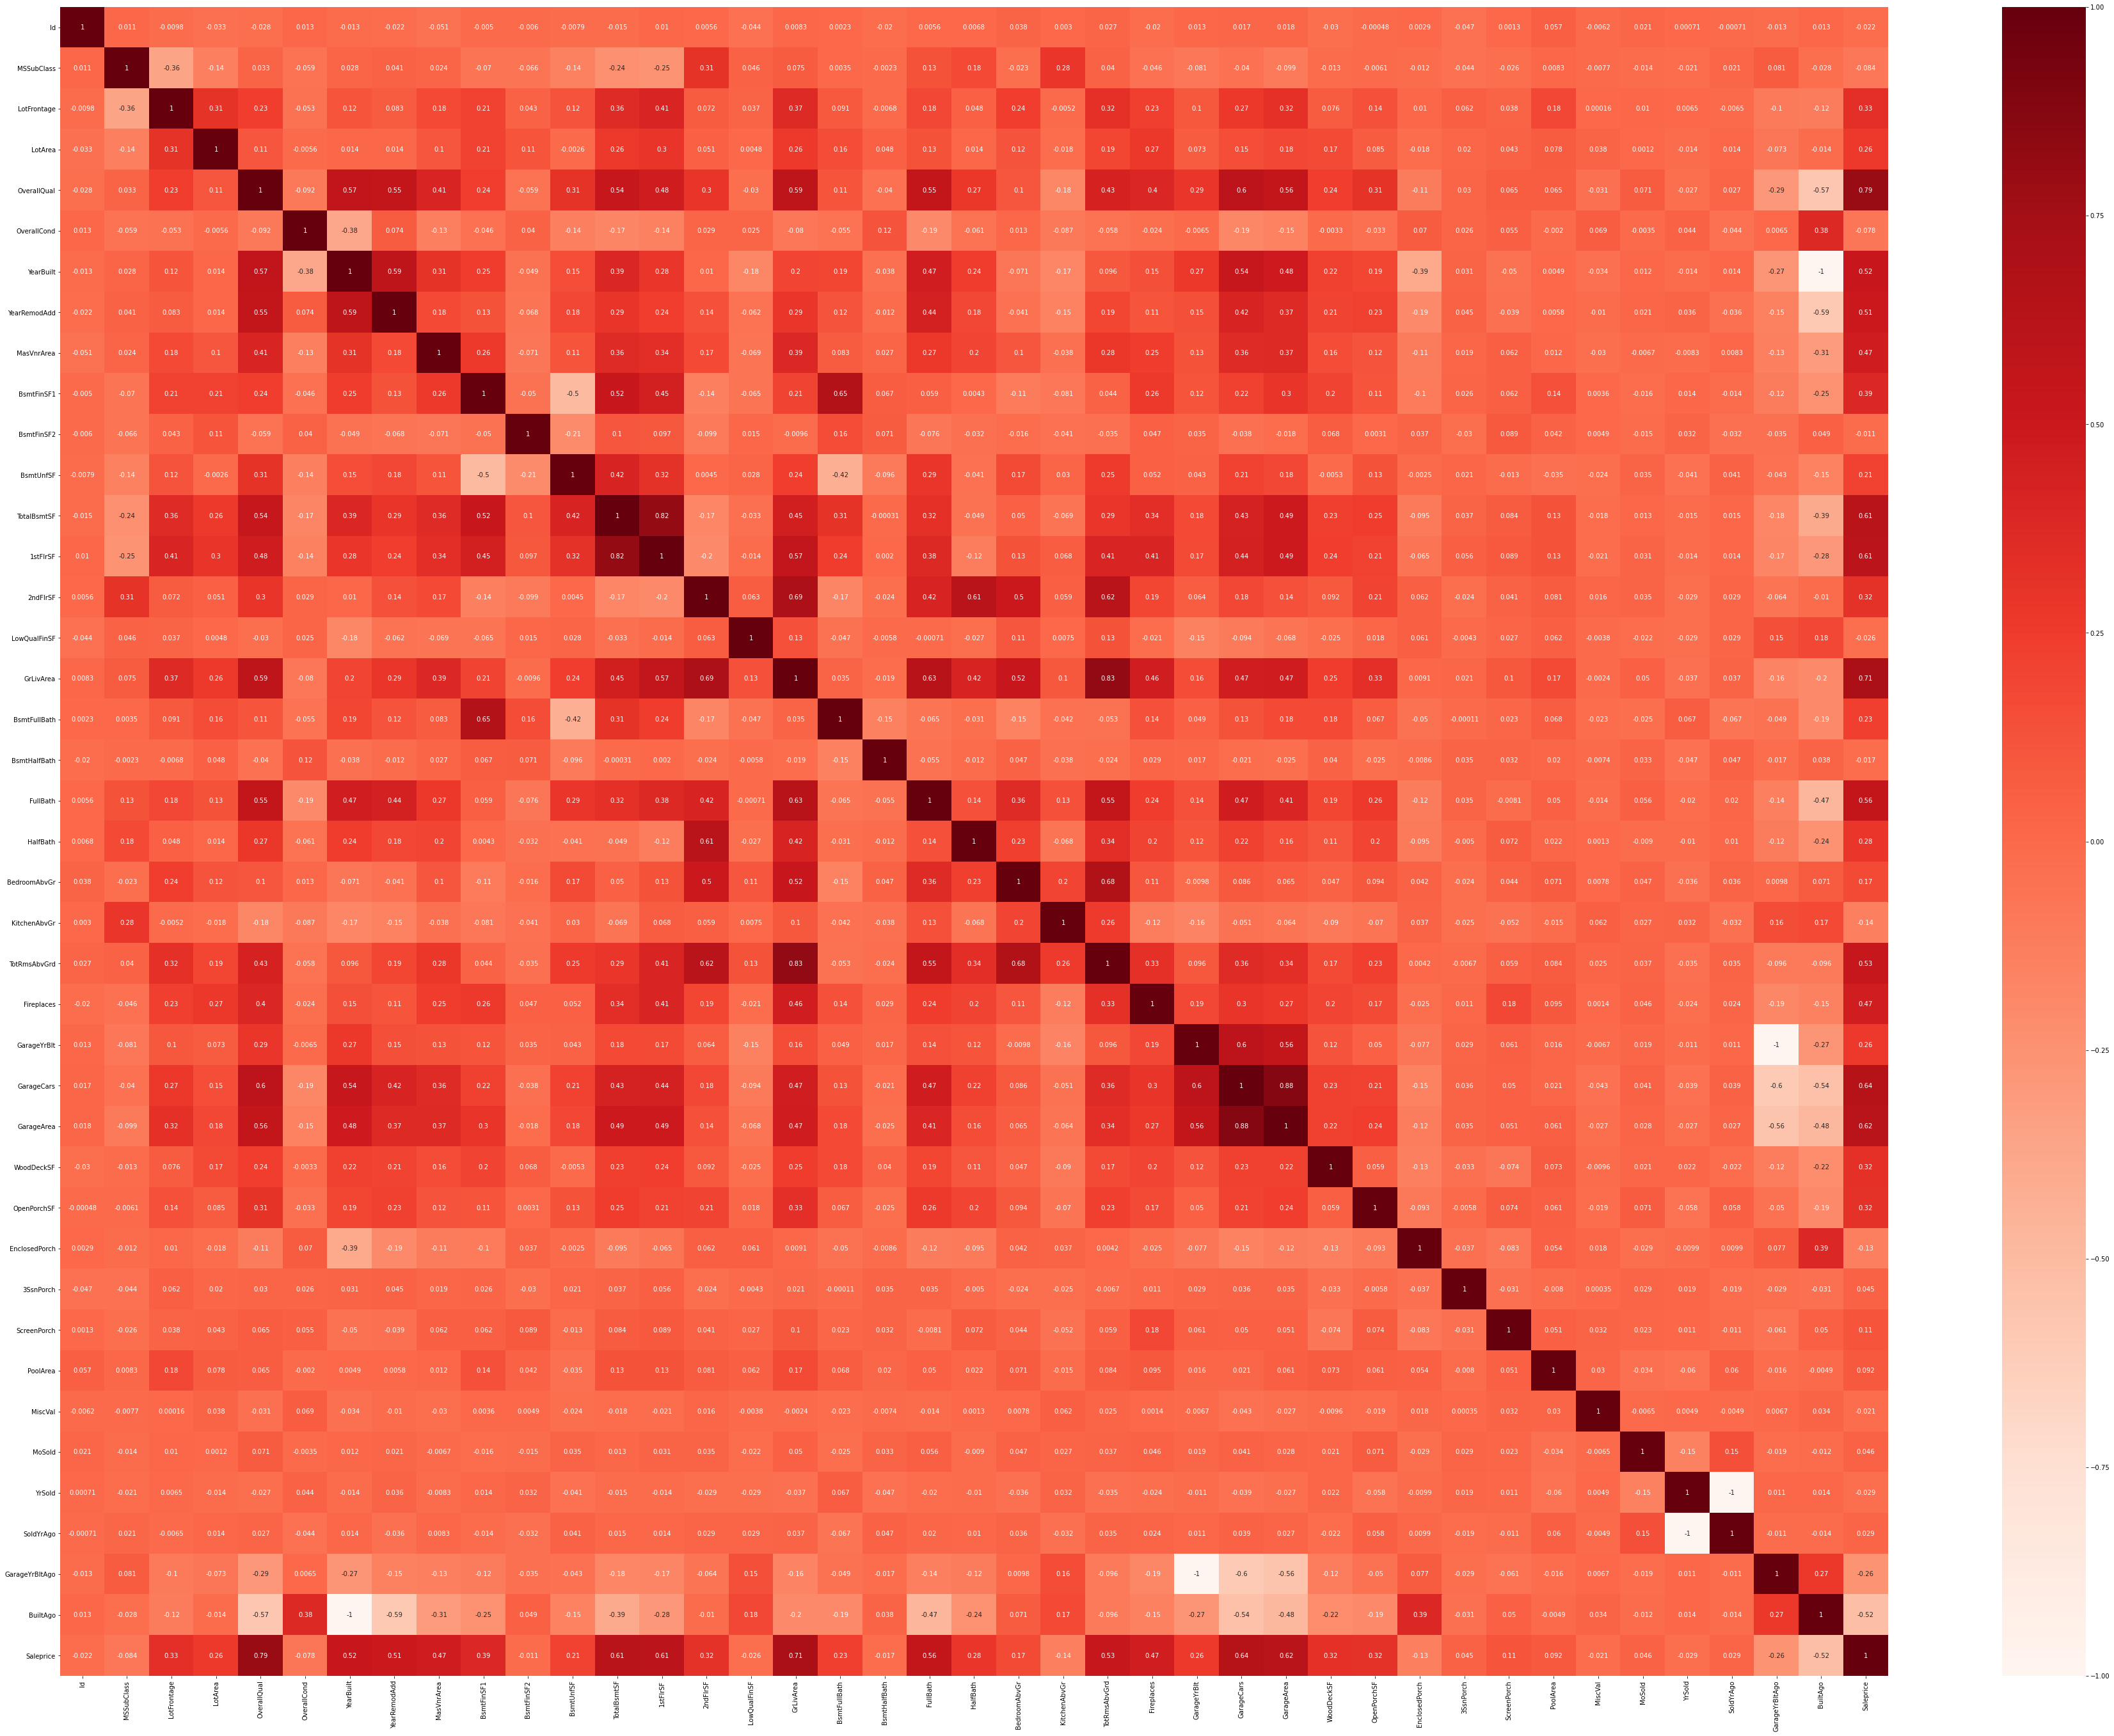

In [128]:
# Plot
# I don't know what I want to plot as the nr. of cols is overwhelming and I don't know much about House-Prices. I will edit the data if I see it is needed in here.

#attention this will take a while
plt.figure(figsize=(64,48))
sns.heatmap(plotdata.corr(),annot=True,cmap='Reds')
plt.show()# a lot of small correlations


In [129]:
#As seen on the Heatmap, the correlations between the parameters and Saleprice are very small.
#It is also notable that YearBuilt and BuiltAgo for example have the same correlation, which is logical as they say the same thing


plotdata.columns#seel what I can plot with

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

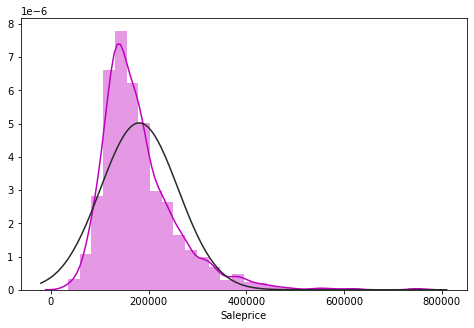

In [130]:
# Looking at the distribution of some cols


plt.figure(figsize=(8,5))
sns.distplot(plotdata['Saleprice'],bins=30,color='m', fit=norm)

In [131]:
# a lot of ml models work better with norm dist.
plotdata["Saleprice"] = np.log1p(plotdata["Saleprice"])
# allData["Saleprice"] = np.log1p(allData["Saleprice"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


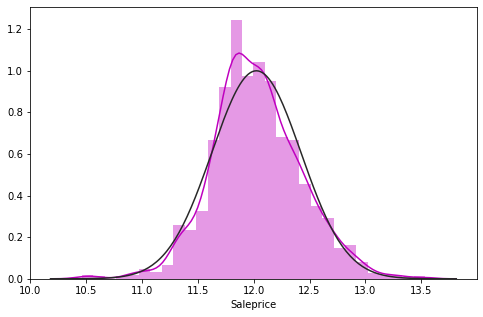

In [132]:
plt.figure(figsize=(8,5))
sns.distplot(plotdata['Saleprice'],bins=30,color='m', fit=norm)

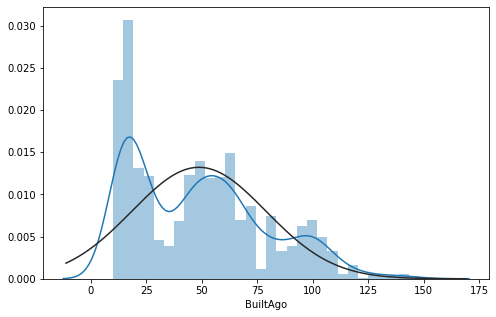

In [133]:
plt.figure(figsize=(8,5))# not a used col
sns.distplot(plotdata['BuiltAgo'],bins=30, fit=norm)# most houses are not that old

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


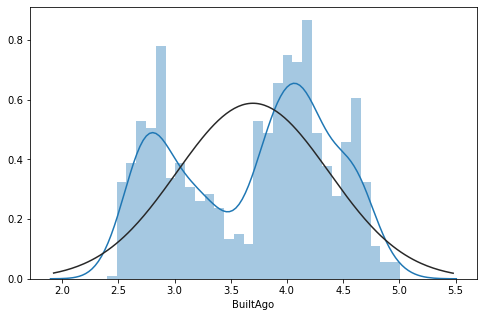

In [134]:

# a lot of ml models work better with norm dist.
plotdata["BuiltAgo"] = np.log1p(plotdata["BuiltAgo"])
plt.figure(figsize=(8,5))
sns.distplot(plotdata['BuiltAgo'],bins=30, fit=norm)# dont know if this is better as it has several bumps I dont change the allData


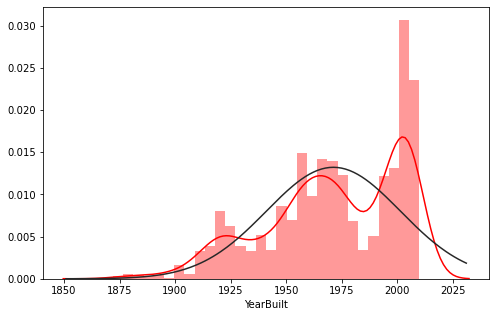

In [135]:
plt.figure(figsize=(8,5))
sns.distplot(plotdata['YearBuilt'],bins=30, fit=norm,color='r')# most houses are not that old

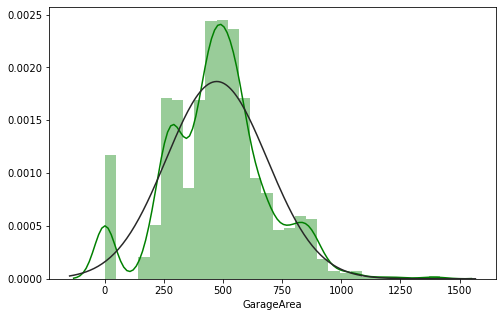

In [136]:
plt.figure(figsize=(8,5))
sns.distplot(plotdata['GarageArea'],bins=30, fit=norm,color='g')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


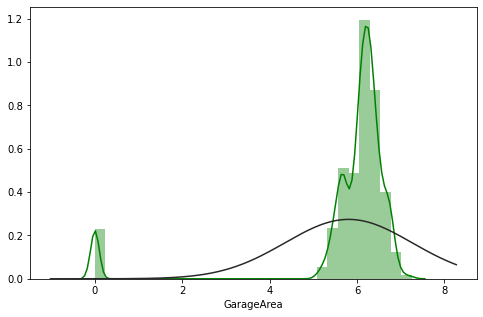

In [137]:
plotdata["GarageArea"] = np.log1p(plotdata["GarageArea"])
plt.figure(figsize=(8,5))
sns.distplot(plotdata['GarageArea'],bins=30, fit=norm,color='g')# much worse?

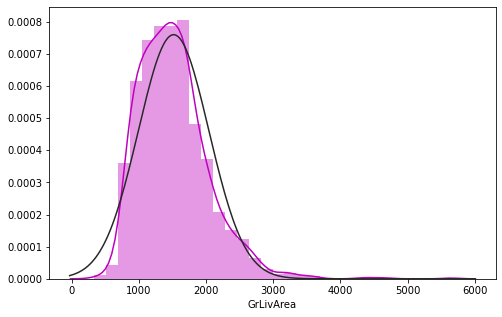

In [138]:
plt.figure(figsize=(8,5))
sns.distplot(plotdata['GrLivArea'],bins=30, fit=norm,color='m')# much worse

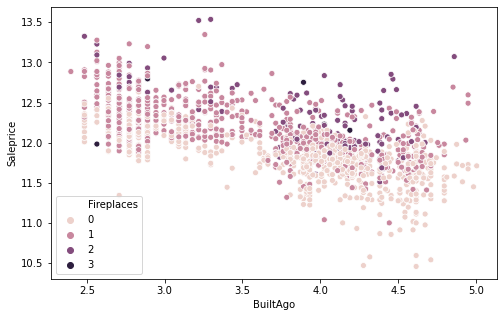

In [139]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="BuiltAgo",y="Saleprice",hue="Fireplaces",  data=plotdata)# fireplaces are nice, but they are not that hard to build if the house does not have one already

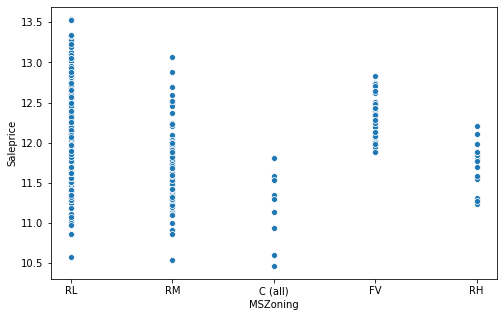

In [140]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="MSZoning",y="Saleprice",  data=plotdata)# some are clearly "cheaper"

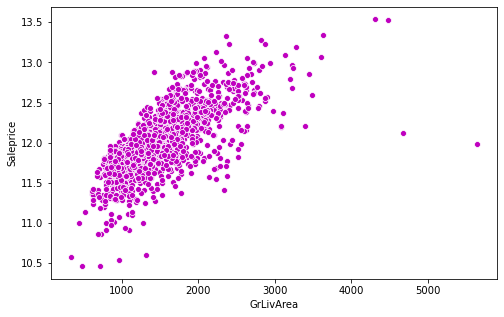

In [141]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="GrLivArea",y="Saleprice",  data=plotdata,color='m')

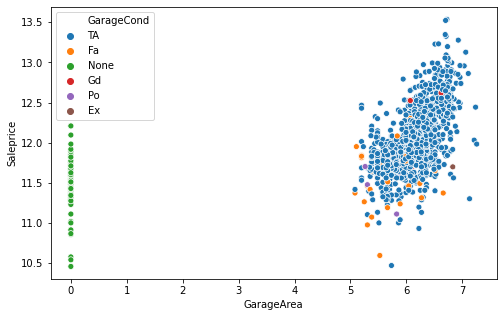

In [142]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="GarageArea",y="Saleprice",hue="GarageCond",  data=plotdata)

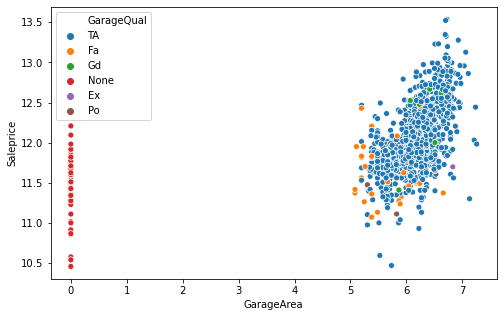

In [143]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="GarageArea",y="Saleprice",hue="GarageQual",  data=plotdata)

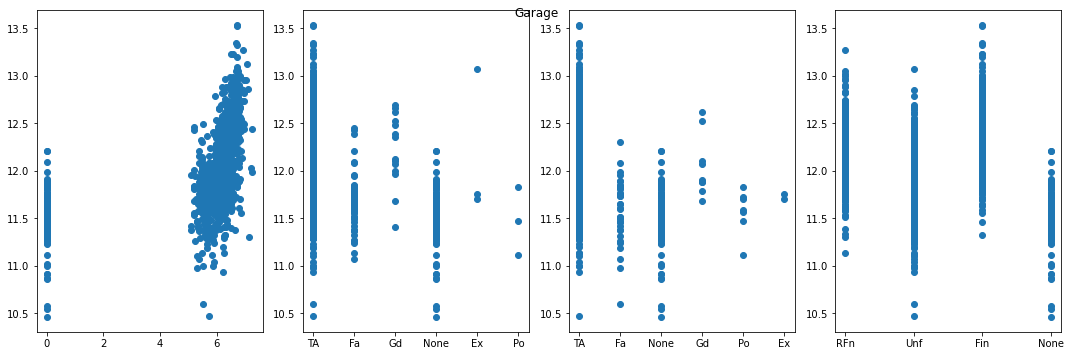

<Figure size 5760x3600 with 0 Axes>

In [144]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(15,5))
plt.figure(figsize=(80,50))
fig.suptitle('Garage')
ax1.scatter(x="GarageArea",y="Saleprice",  data=plotdata, linewidth=1)
ax2.scatter(x="GarageQual",y="Saleprice",  data=plotdata, linewidth=1)
ax3.scatter(x="GarageCond",y="Saleprice",  data=plotdata, linewidth=1)
ax4.scatter(x="GarageFinish",y="Saleprice",  data=plotdata, linewidth=1)

fig.tight_layout()

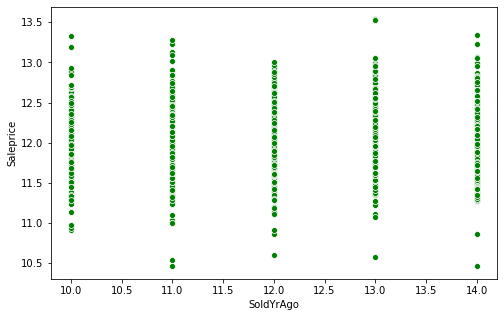

In [145]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="SoldYrAgo",y="Saleprice", data=plotdata,color='g')#older sales=> more expensive  (bubble?)

In [146]:
# Models
# testing a lot of several models.

#data for the models
trainX=np.array(allData[:trainLen])
testX=np.array(allData[trainLen:])
trainY=np.array(trainY)
# Linear regression

# from sklearn.linear_model import LinearRegression

# modelLin = LinearRegression()
# modelLin.fit(train, trainY)
# predTrain=modelLin.predict(train)
# LinAcc = mean_squared_error(predTrain, trainY)
# print (str(LinAcc) + ' MSE') #Score= 1.49904
#the score seems to be very bad

# XGBoost

# import xgboost
#Hypertunning 1
#attention, the hypertunning may take a very long time

# #xgboost
# modelX=xgboost.XGBRegressor(verbose=2)

# n_estimators = [500, 900, 2000] # a lot of cols=> many estim..
# max_depth = [3, 6,9,12]
# booster=['gbtree','gblinear'] #"dart"
# learning_rate=[.02,.05,.1,.2]
# min_child_weight=[2,5,9]
# base_score=[.01,.25,.5,.75]
# max_depth=[2,4,6,8]
# min_split_loss=[0,0.01,.1]
# hyperparameter_grid = {
#     'n_estimators': n_estimators,
#     'max_depth':max_depth,
#     'learning_rate':learning_rate,
#     'min_child_weight':min_child_weight,
#     'booster':booster,
#     'base_score':base_score,
#     "max_depth":max_depth,
#     "min_split_loss":min_split_loss}

# random_cv = RandomizedSearchCV(estimator=modelX,
#             param_distributions=hyperparameter_grid,
#             cv=5, n_iter=100,
#             scoring='neg_root_mean_squared_error',
#                                n_jobs = -1,
#             verbose = 10, 
#             return_train_score = True,
#             random_state=42)

# random_cv.fit(trainX,trainY)

# random_cv.best_estimator_    #if best estim are at the edge=> additional tests

# modelX=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.02, max_delta_step=0, max_depth=4,
#              min_child_weight=9, min_split_loss=0, missing=None,
#              monotone_constraints='()', n_estimators=2000, n_jobs=0,
#              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
#              scale_pos_weight=1, subsample=1, tree_method='exact',
#              validate_parameters=1, verbosity=None)
# Hypertunning 2

# #xgboost 2. tuning after getting the base estimates
# modelX=xgboost.XGBRegressor(verbose=2)

# n_estimators = [1500, 2000,2500] # a lot of cols=> many estim..
# max_depth = [3, 5,6]
# booster=['gbtree'] #"dart"
# learning_rate=[.01,.02,.03]
# min_child_weight=[7,9]
# base_score=[.4,.5,.6]
# max_depth=[2,4,6,8]
# min_split_loss=[0]
# hyperparameter_grid = {
#     'n_estimators': n_estimators,
#     'max_depth':max_depth,
#     'learning_rate':learning_rate,
#     'min_child_weight':min_child_weight,
#     'booster':booster,
#     'base_score':base_score,
#     "max_depth":max_depth,
#     "min_split_loss":min_split_loss}

# random_cv = RandomizedSearchCV(estimator=modelX,
#             param_distributions=hyperparameter_grid,
#             cv=5, n_iter=50,
#             scoring='neg_root_mean_squared_error',
#                                n_jobs = -1,
#             verbose = 10, 
#             return_train_score = True,
#             random_state=42)

# random_cv.fit(trainX,trainY)

# random_cv.best_estimator_    #if best estim are at the edge=> additional tests

# modelX=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.02, max_delta_step=0, max_depth=8,
#              min_child_weight=9, min_split_loss=0, missing=None,
#              monotone_constraints='()', n_estimators=2000, n_jobs=0,
#              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
#              scale_pos_weight=1, subsample=1, tree_method='exact',
#              validate_parameters=1, verbose=2, verbosity=None)

# modelX.fit(trainX,trainY)

# predTrain=modelX.predict(trainX)
# XAcc = mean_squared_error(predTrain, trainY)
# print (str(XAcc) + ' MSE')
# Notes:
#the 2. Hypertuned XGBoost model has a better MSE with the training data but performs worse with the test data:

#1 Hyper...= 0.13105 score
#2 Hyper...= 0.0.13458 score

# Random Forrest

from sklearn.ensemble import  RandomForestRegressor
#Hypertunning 1
#attention, the hypertunning may take a long time

# modelForrest=RandomForestRegressor()# not regressor

# #Hypertunning    from https://www.kaggle.com/harshkothari21/beginners-notebook-90-accuracy
# n_estimators = [100,300, 500, 1000]
# depth = [3,5,10,15]
# min_split=[2,3,4]
# min_leaf=[2,3,4]
# bootstrap = ['True', 'False']
# verbose = [5]

# hyperparameter = {
#     'n_estimators': n_estimators,
#     'max_depth':depth,
#     'bootstrap':bootstrap,
#     'verbose':verbose,
#     'min_samples_split':min_split,
#     'min_samples_leaf':min_leaf    }

# OptForrest = RandomizedSearchCV(estimator=modelForrest,
#                                param_distributions=hyperparameter,
#                                cv=5, 
#                                scoring = 'neg_mean_absolute_error',
#                                n_jobs = 4, 
#                                return_train_score = True,
#                                random_state=1)
# OptForrest.fit(trainX,trainY)

# OptForrest.best_estimator_    #if best estim are at the edge=> additional tests

# OptForrest=RandomForestRegressor(bootstrap='False', max_depth=15, min_samples_leaf=3,
#                       verbose=1)
# OptForrest.fit(trainX,trainY)

# predTrain=OptForrest.predict(trainX)
# ForrestAcc = mean_squared_error(predTrain, trainY)
# print (str(ForrestAcc) + ' MSE') # score= 0.14782
#Hypertunning 2
#manually tuning

# OptForrest=RandomForestRegressor(n_estimators=1100, bootstrap='True', max_depth=14, min_samples_leaf=3,
#                       verbose=1)
# OptForrest.fit(trainX,trainY)

# predTrain=OptForrest.predict(trainX)
# ForrestAcc = mean_squared_error(predTrain, trainY)
# print (str(ForrestAcc) + ' MSE') # score=0.14603

# Ridge Regressor

from sklearn.linear_model import Ridge

# ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
# ridgeModel = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

# Light Gradient Boosting

from lightgbm import LGBMRegressor
#Hypertunning 1 attention, the hypertunning may take along time
#(I don't know much about light gbm -> can't hypertune very well)

# modelLight=LGBMRegressor()

# n_estimators = [ 700, 1000, 1500, 2000, 3000]
# learning_rate=[.02,.05,.1,.15,.20]
# max_depth =[0,3, 5, 8]
# num_leaves =[16,25,31]  #Maximum tree leaves

# hyperparameter_grid = {
#     'n_estimators': n_estimators,
#     'learning_rate':learning_rate,
#     'num_leaves':num_leaves,
#     "max_depth": max_depth}

# modelLight = RandomizedSearchCV(estimator=modelLight,
#             param_distributions=hyperparameter_grid,
#             cv=5, n_iter=50,
#             scoring = 'neg_mean_absolute_error',n_jobs = 4,
#             verbose = 5, 
#             return_train_score = True,
#             random_state=42)
# modelLight.fit(trainX,trainY)
# Fitting 5 folds for each of 30 candidates, totalling 150 fits
#[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
#[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    8.4s
#[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.2min
#[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:  3.0min finished

In [147]:
RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=30, n_jobs=4,
                   param_distributions={'learning_rate': [0.02, 0.05, 0.1, 0.15,
                                                          0.2],
                                        'max_depth': [0, 3, 5, 8],
                                        'n_estimators': [700, 1000, 1500, 2000,
                                                         3000],
                                        'num_leaves': [16, 25, 31]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

# modelLight.best_estimator_    #if best estim are at the edge=> additional tests

LGBMRegressor(learning_rate=0.05, max_depth=3, n_estimators=1000, num_leaves=16)

# modelLight =LGBMRegressor(learning_rate=0.05, max_depth=3, n_estimators=1000, num_leaves=16)# 0.13140
# modelLight.fit(trainX,trainY)

LGBMRegressor(learning_rate=0.05, max_depth=3, n_estimators=1000, num_leaves=16)

# predTrain=modelLight.predict(trainX)
# LightAcc = mean_squared_error(predTrain, trainY)
# print (str(LightAcc) + ' MSE') # score= 0.13140
#As I don't know much about light gbm I also looked ad another notebook https://www.kaggle.com/jesucristo/1-house-prices-solution-top-1


modelLight = LGBMRegressor(objective='regression', 
                        num_leaves=6,
                        learning_rate=0.01, 
                        n_estimators=7000,
                        max_bin=200, 
                        bagging_fraction=0.8,
                        bagging_freq=4, 
                        bagging_seed=8,
                        feature_fraction=0.2,
                        feature_fraction_seed=8,
                        min_sum_hessian_in_leaf = 11,
                        verbose=-1,
                        random_state=42)

modelLight.fit(trainX, np.ravel(trainY))

predTrain=modelLight.predict(trainX)
LightAcc = mean_squared_error(predTrain, trainY)
#print (str(LightAcc) + ' MSE') # score= 0.12323
#99712593.63767394 MSE

#SVR

from sklearn.svm import SVR

# modelSvr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

#Gradient Boost

from sklearn.ensemble import  GradientBoostingRegressor
#Hypertunning 1 attention, the hypertunning may take a very long time


# modelGrad=GradientBoostingRegressor()

# n_estimators = [ 700, 1000, 1500, 2000, 3000]
# loss=[ "huber"]
# criterion=["friedman_mse"]
# learning_rate=[.02,.05,.1,.15,.20]
# min_samples_split=[1,3, 5, 8]
# min_samples_leaf=[1, 2, 3, 4, 5]
# hyperparameter_grid = {
#     'n_estimators': n_estimators,
#     'learning_rate':learning_rate,
#     'min_samples_split':min_samples_split,
#     "loss" :loss,
#     'min_samples_leaf':min_samples_leaf,
#     "criterion": criterion}

# modelGrad = RandomizedSearchCV(estimator=modelGrad,
#             param_distributions=hyperparameter_grid,
#             cv=5, n_iter=50,
#             scoring = 'neg_mean_absolute_error',n_jobs = 4,
#             verbose = 5, 
#             return_train_score = True,
#             random_state=42)
# modelGrad.fit(trainX,trainY)

# modelGrad.best_estimator_    #if best estim are at the edge=> additional tests

# modelGrad=GradientBoostingRegressor(learning_rate=0.02, loss='huber', min_samples_split=3,
#                           n_estimators=3000)
# modelGrad.fit(trainX,trainY)

# predTrain=modelGrad.predict(trainX)
# GradAcc = mean_squared_error(predTrain, trainY)
# print (str(GradAcc) + ' MSE') # score= 0.13621

# ElasticNet

from sklearn.linear_model import ElasticNet

# Lasso


# Adaboost

from sklearn.ensemble import  AdaBoostRegressor
#Hypertunning 1


# modelAda=AdaBoostRegressor()

# n_estimators = [ 700, 1000, 1500, 2000, 3000]
# loss=[ "linear", "square"]
# learning_rate=[.02,.1,.15,.60, 1]

# hyperparameter_grid = {
#     'n_estimators': n_estimators,
#     'learning_rate':learning_rate,
#     "loss" :loss,
#     }

# modelAda = RandomizedSearchCV(estimator=modelAda,
#             param_distributions=hyperparameter_grid,
#             cv=5, n_iter=50,
#             scoring = 'neg_mean_absolute_error',n_jobs = 4,
#             verbose = 5, 
#             return_train_score = True,
#             random_state=42)
# modelAda.fit(trainX,trainY)
#Fitting 5 folds for each of 50 candidates, totalling 250 fits
#[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
#[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   54.9s
#[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  7.6min
#[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 18.1min
#[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 29.1min finished

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_iter=50, n_jobs=4,
                   param_distributions={'learning_rate': [0.02, 0.1, 0.15, 0.6,
                                                          1],
                                        'loss': ['linear', 'square'],
                                        'n_estimators': [700, 1000, 1500, 2000,
                                                         3000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

# modelAda.best_estimator_    #if best estim are at the edge=> additional tests

AdaBoostRegressor(learning_rate=0.02, n_estimators=1500)

# modelAda=AdaBoostRegressor(learning_rate=0.02, n_estimators=1500)
# modelAda.fit(trainX,trainY)

AdaBoostRegressor(learning_rate=0.02, n_estimators=1500)

# predTrain=modelAda.predict(trainX)
# AdaAcc = mean_squared_error(predTrain, trainY)
# print (str(AdaAcc) + ' MSE') # score= 0.20880
#778316088.8710116 MSE
#Stacking the models

from mlxtend.regressor import StackingCVRegressor

# modelStack = StackingCVRegressor(regressors=(modelRidge, ModelLasso, modelNet, # im testing with dif models
#                                             modelForrest, modelX, modelLight
#                                             modelSvr, modelAda),
#                                 meta_regressor=modelX,
#                                 use_features_in_secondary=True)

# modelStack.fit(trainX,trainY)

# predTrain=modelAda.predict(trainX)
# AdaAcc = mean_squared_error(predTrain, trainY)
# print (str(AdaAcc) + ' MSE') # score=
#notes:

#save Prediction

In [152]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [155]:
predictions=pd.DataFrame({'Id': test.Id,'SalePrice': modelLight.predict(testX)})

AttributeError: 'DataFrame' object has no attribute 'id'

In [149]:
predictions

,Id,SalePrice
0,0,123588.017734
1,1,165490.662779
2,2,186677.564504
3,3,196687.876538
4,4,189851.991866
...,...,...
1454,1454,83188.175581
1455,1455,82214.164427
1456,1456,170600.646855
1457,1457,121670.491822


In [151]:
predictions.to_csv("submission.csv", index=False)